In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'C:\Users\Tejal\Documents\Tejal\College\SSCI580\Project\Sentiment analysis\full_us_senti.csv',sep=',')

In [4]:
data['Date'].dtype

dtype('O')

In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data.head()

,Unnamed: 0,Date,Hour,Tweet content,Latitude,Longitude,Senti
0,0,2016-04-16,12:44,"Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...",40.760278,-72.954722,0
1,1,2016-04-16,12:44,Good. Morning. #morning #Saturday #diner #VT #...,44.199476,-72.504173,4
2,2,2016-04-16,12:44,recordstoredayus ?????? @ TOMS MUSIC TRADE,39.901474,-76.606817,4
3,3,2016-04-16,12:44,Egg in a muffin!!! (@ Rocket Baby Bakery - @ro...,43.060849,-87.998309,4
4,4,2016-04-16,12:44,should've gave the neighbor a buzz. Iv got i...,36.041913,-75.681862,4


In [7]:
data = data.rename(columns={'Hour': 'Time'})

In [8]:
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

In [9]:
tempo_data = data.groupby(['Date','Hour','Senti']).size()

In [10]:
tempo_data=tempo_data.to_frame().reset_index()

In [11]:
tempo_data.axes

[RangeIndex(start=0, stop=100, step=1),
 Index([u'Date', u'Hour', u'Senti', 0], dtype='object')]

In [12]:
df1 = pd.DataFrame(tempo_data[tempo_data['Senti']== 0])
df2 = pd.DataFrame(tempo_data[tempo_data['Senti']== 4])

In [17]:
djoined = df1.merge(df2,on=['Date','Hour'])

In [18]:
djoined = djoined.rename(columns={'Senti_x': 'Neg_senti','0_x':'Neg_count','Senti_y':'Pos_senti','0_y':'Pos_count'})

In [22]:
djoined['Total']=djoined['Neg_count']+djoined['Pos_count']

In [23]:
djoined['Total']=djoined['Total'].astype(float)

In [24]:
djoined['Date']=djoined['Date'].astype(str)

In [25]:
djoined['Prop_neg']=djoined['Neg_count']/djoined['Total']*100

In [42]:
df1 = djoined[djoined['Date'] == '2016-04-14']

In [28]:
df1.to_csv(r'C:\Users\Tejal\Documents\Tejal\College\SSCI580\Project\Sentiment analysis\sent_2016_04_14.csv',sep=',')

In [31]:
df1.head(13)

,Date,Hour,Neg_senti,Neg_count,Pos_senti,Pos_count,Total,Prop_neg
0,2016-04-14,10,0,247,4,1870,2117.0,11.667454
1,2016-04-14,11,0,65,4,360,425.0,15.294118
2,2016-04-14,12,0,182,4,2408,2590.0,7.027027
3,2016-04-14,13,0,183,4,2397,2580.0,7.093023
4,2016-04-14,14,0,85,4,1206,1291.0,6.584043
5,2016-04-14,15,0,165,4,2442,2607.0,6.329114
6,2016-04-14,16,0,400,4,6140,6540.0,6.116208
7,2016-04-14,17,0,558,4,7280,7838.0,7.119163
8,2016-04-14,18,0,240,4,3314,3554.0,6.752954
9,2016-04-14,19,0,69,4,434,503.0,13.717694


In [ ]:
djoined = djoined.rename(columns={'Senti_x': 'Neg_senti','0_x':'Neg_count','Senti_y':'Pos_senti','0_y':'Pos_count

In [43]:
df1=df1.rename(columns={'Prop_neg':'Neg tweet percent'})

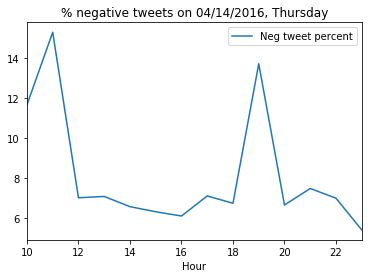

In [44]:
df1.plot( kind='line', x='Hour', y='Neg tweet percent',title='% negative tweets on 04/14/2016, Thursday')
axes = plt.gca()
plt.show()


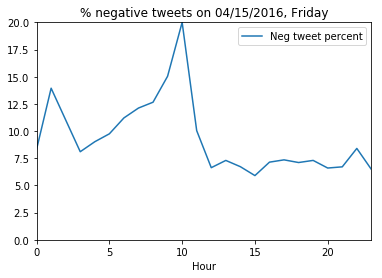

In [40]:
df1 = djoined[djoined['Date'] == '2016-04-15']
df1=df1.rename(columns={'Prop_neg':'Neg tweet percent'})
df1.plot( kind='line', x='Hour', y='Neg tweet percent',title='% negative tweets on 04/15/2016, Friday')
axes = plt.gca()
axes.set_ylim([0,20])
plt.show()

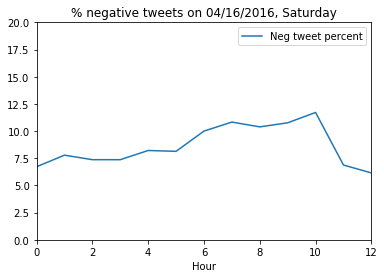

In [45]:
df1 = djoined[djoined['Date'] == '2016-04-16']
df1=df1.rename(columns={'Prop_neg':'Neg tweet percent'})
df1.plot( kind='line', x='Hour', y='Neg tweet percent',title='% negative tweets on 04/16/2016, Saturday')
axes = plt.gca()
axes.set_ylim([0,20])
plt.show()

In [ ]:
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')